# Linear Regression


`Linear Regression` is a `supervised machine learning` algorithm where the predicted output is continuous and has a constant slope. It's used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- Simple regression - only one independent variable (e.g. sales)
- Multiple regression - more than one independent variables (e.g. sales, price)

# Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [57]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

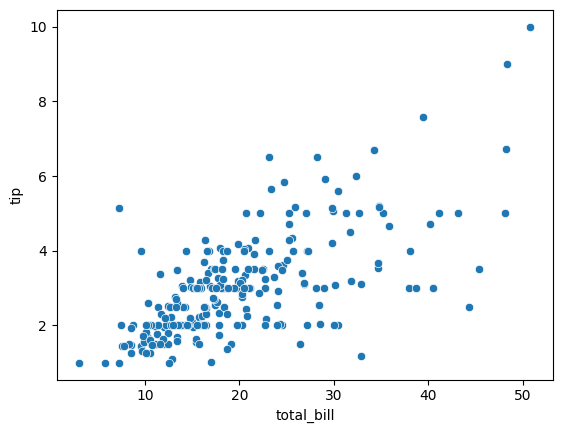

In [59]:

sns.scatterplot(x='total_bill', y='tip', data=df)

In [60]:

# split the data into X and y
X = df[['total_bill']]

y = df['tip']

In [61]:

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:

# call the model
model = LinearRegression()


In [63]:

# train the model
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')


0.8529542296129207
[0.10858229]
y =  0.8529542296129207 + [0.10858229] * X


In [65]:

# predict
y_pred = model.predict(X_test)
y_pred

array([4.61533048, 3.00505516, 2.38070701, 4.63270364, 2.20588953,
       5.25596597, 2.79874881, 2.48603183, 2.42522575, 2.79549135,
       6.37002024, 3.28736911, 3.32428708, 1.77698949, 2.55661031,
       3.62831749, 2.81177869, 3.72061243, 2.00718394, 2.74880096,
       4.42531147, 1.94854951, 4.41771071, 2.29384118, 2.63913285,
       3.74015724, 3.12449568, 2.6130731 , 1.66840721, 2.02238546,
       3.0495739 , 1.47730238, 2.26778143, 3.38617899, 5.77716095,
       3.073462  , 4.57732668, 2.98659617, 2.23629257, 2.83892426,
       1.97569508, 2.36659131, 3.1874734 , 2.38939359, 1.89534419,
       2.31012852, 2.5272931 , 1.64017581, 1.93226216])

In [66]:

model.predict([[5]])

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.39586567])

In [67]:

# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  1.6522356409822319
R2 =  0.3422356826476419
RMSE =  1.2853931853647862


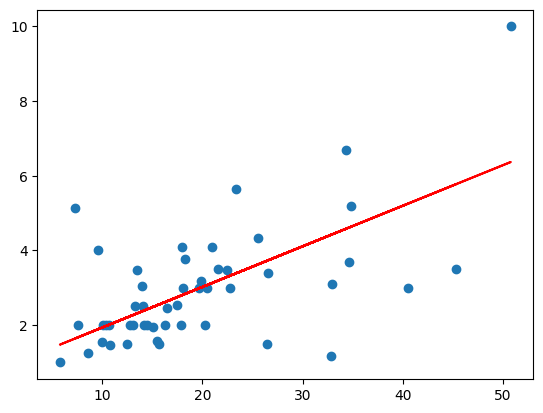

In [68]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

# Pre-processing the dataset

In [136]:
df = sns.load_dataset('tips')

In [137]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [138]:
# checking for null values

df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [139]:
# checking for duplicate values
df.duplicated().sum()

np.int64(1)

In [140]:
# dropping duplicate values

df.drop_duplicates(inplace=True)

<Axes: ylabel='total_bill'>

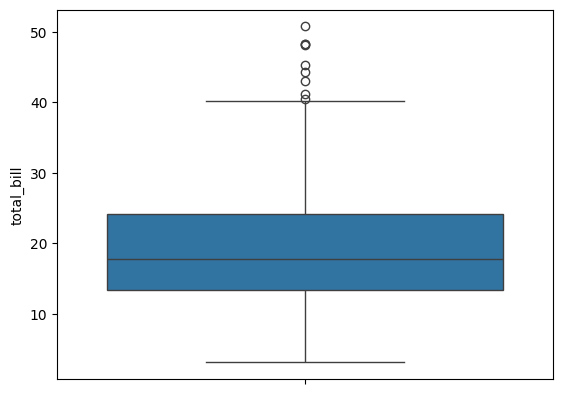

In [141]:
# checking for outliers in total_bill column

sns.boxplot(df['total_bill'])


<Axes: ylabel='tip'>

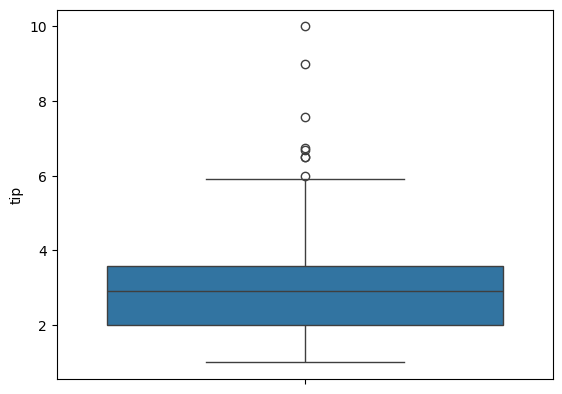

In [142]:
# checking for outliers in tips column

sns.boxplot(df['tip'])

In [143]:
# removing the outliers in total_bill

q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr

lower_limit = q1 - 1.5 * iqr

df = df[(df['total_bill'] > lower_limit) & (df['total_bill'] < upper_limit)]


<Axes: ylabel='total_bill'>

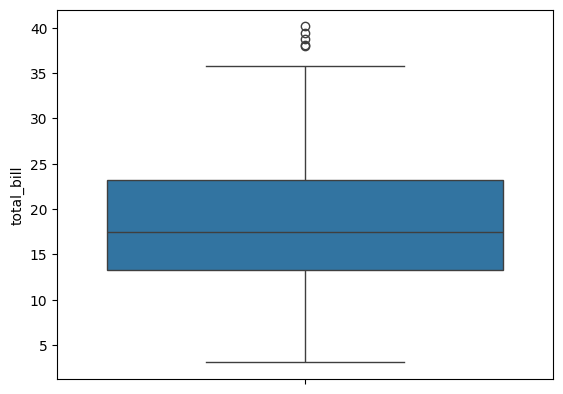

In [144]:
sns.boxplot(df['total_bill'])

In [145]:
# removing outlier in tips

q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr

lower_limit = q1 - 1.5 * iqr

df = df[(df['tip'] > lower_limit) & (df['tip'] < upper_limit)]

<Axes: ylabel='tip'>

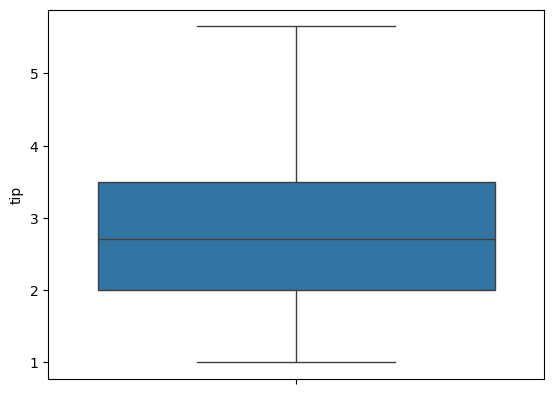

In [146]:
sns.boxplot(df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

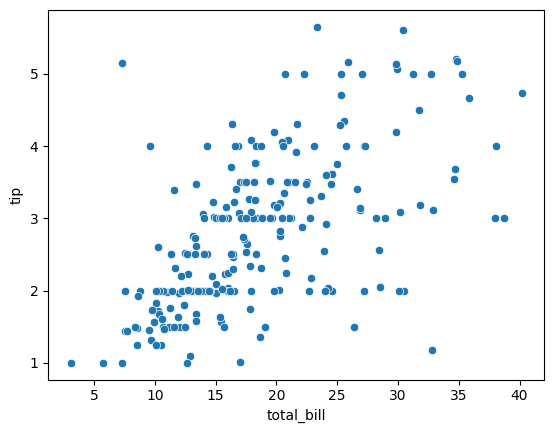

In [147]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [148]:
# splitting the data into X and y

X = df[['total_bill']]
y = df['tip']

In [149]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# calling the model

model = LinearRegression()

In [151]:
# training the model

model.fit(X_train, y_train)

LinearRegression()

In [162]:
# getting the coefficient and intercept and equation

print(model.coef_)
print(model.intercept_)
print('y = ' , model.intercept_ ,' + ' , model.coef_ ,'* X')


[0.08824883]
1.1566771762253543
y =  1.1566771762253543  +  [0.08824883] * X


In [152]:
# predicting the model

y_pred = model.predict(X_test)
y_pred

array([2.46099495, 2.39833827, 3.06108702, 3.17051557, 2.27390742,
       3.16522064, 2.94548105, 2.25625765, 3.11844876, 2.33656409,
       2.41951799, 2.75839352, 2.17948116, 2.9790156 , 2.77604328,
       2.18830605, 2.61984285, 2.41510555, 3.7132459 , 2.76986587,
       3.50321368, 2.25802263, 2.7292714 , 2.09476228, 2.65425989,
       2.96489579, 3.48732889, 2.51394425, 2.73544882, 3.29847638,
       2.98254556, 2.73809629, 2.04534294, 2.06828763, 2.09652726,
       2.98872297, 2.56424608, 3.05402711, 3.32318606, 2.84046493,
       4.23038407, 1.81942592, 3.78649244, 3.52704086, 3.79796478,
       2.21831065])

In [153]:
model.predict([[15]])

c:\Users\Hamad\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.48040969])

In [154]:
# evaluating the model

print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.7901983960904421
R2 =  0.29314600366047006
RMSE =  0.8889310412458562


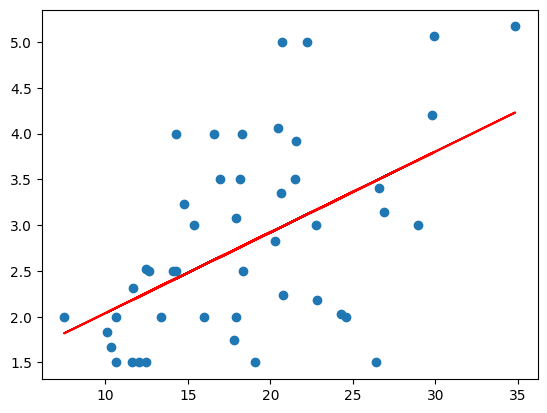

In [155]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()